# Feature Selection

## Import Libraries

In [95]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [96]:
df = pd.read_csv("clean.csv")

In [97]:
# Check type of predictor feature
print('Name and type of varialbes are: \n')
print(df.dtypes)
print('\nThe number of variables is %d' %len(df.columns))
print('...The number of categorical variables is %d' %(df.shape[1] - sum(df.dtypes=='float64') - sum(df.dtypes=='int64'))) # <- Count object type (Categorical variable) 
print('...The number of continuous variable is %d' %(sum(df.dtypes=='float64') + sum(df.dtypes=='int64'))) # <- Count float type (Continuos variable)

list_predictor_continuous = []
list_predictor_categorical = []

for name in df.columns[3:]:
    if df[name].dtype == 'float64' or df[name].dtype == 'int64':
        list_predictor_continuous.append(name)
    else:
        list_predictor_categorical.append(name)

print('List of continuous predictor:')
print(list_predictor_continuous)
print('List of categorical predictor:')
print(list_predictor_categorical)

Name and type of varialbes are: 

Unnamed: 0          int64
Name               object
Age                 int64
Nationality        object
Overall             int64
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 85, dtype: object

The number of variables is 85
...The number of categorical variables is 42
...The number of continuous variable is 43
List of continuous predictor:
['Overall', 'Potential', 'Special', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDi

In [98]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [99]:
features = ['Special', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

X = df[features]
y = df['Overall']

[0.0336539  0.00643319 0.017323   0.01058803 0.02274744 0.02580605
 0.02693792 0.02839204 0.02924486 0.02403512 0.02974855 0.02337286
 0.0228007  0.02461195 0.03353969 0.02383803 0.02411351 0.02284088
 0.03810088 0.02259622 0.02554354 0.02327414 0.02495417 0.02564853
 0.02473469 0.02545552 0.03080289 0.02926484 0.02561705 0.02332463
 0.02897979 0.02987988 0.03192363 0.02935454 0.02702052 0.02632638
 0.02391432 0.02659262 0.02666349]


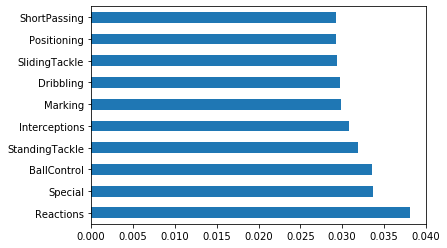

In [100]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [101]:
cat_features = ['Nationality', 'Club', 'Value', 'Wage', 'Preferred Foot', 'Work Rate', 'Body Type', 'Real Face', 'Position', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'Release Clause']

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder

Rredictor_Categorical = df[cat_features].values

# Integer Encoding for Categorical variable
enc_pred = OrdinalEncoder() # <- Keep this instance for inverse transform after prediction
Rredictor_Categorical_en = enc_pred.fit_transform(Rredictor_Categorical)

In [102]:
X = pd.DataFrame(Rredictor_Categorical_en)

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=77777)

In [107]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

fs = SelectKBest(score_func=chi2, k=5)
fs.fit(X_train, y_train)

fs_support = fs.get_support()
fs_feature = X.loc[:,fs_support].columns.tolist()
print(str(fs_feature), 'selected features')

[1, 2, 3, 9, 14] selected features


In [108]:
new = enc_pred.inverse_transform(X)

In [110]:
cate = pd.DataFrame(new)

In [112]:
cate.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Argentina,FC Barcelona,€110.5M,€565K,Left,Medium/ Medium,Messi,Yes,RF,"Jul 1, 2004",None,2021,5'7,159lbs,€226.5M
1,Portugal,Juventus,€77M,€405K,Right,High/ Low,C. Ronaldo,Yes,ST,"Jul 10, 2018",None,2022,6'2,183lbs,€127.1M
2,Brazil,Paris Saint-Germain,€118.5M,€290K,Right,High/ Medium,Neymar,Yes,LW,"Aug 3, 2017",None,2022,5'9,150lbs,€228.1M
3,Spain,Manchester United,€72M,€260K,Right,Medium/ Medium,Lean,Yes,GK,"Jul 1, 2011",None,2020,6'4,168lbs,€138.6M
4,Belgium,Manchester City,€102M,€355K,Right,High/ High,Normal,Yes,RCM,"Aug 30, 2015",None,2023,5'11,154lbs,€196.4M


### Best categorical features for Overall are Club, Value, Wage, Joined and Release Clause